In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(rc={'figure.figsize': (9, 6)})

In [9]:
events_data = pd.read_csv('events_data_test.csv')
submission_data = pd.read_csv('submission_data_test.csv')

In [12]:
events_data['date'] = pd.to_datetime(events_data['timestamp'], unit='s')
events_data['day'] = events_data['date'].dt.date

In [14]:
submission_data['date'] = pd.to_datetime(submission_data['timestamp'], unit='s')
submission_data['day'] = submission_data['date'].dt.date

In [39]:
events_data.timestamp.min(), events_data.timestamp.max()

(1526788741, 1548003643)

In [41]:
submission_data.timestamp.min(), submission_data.timestamp.max()

(1526800069, 1548003218)

In [42]:
events_data

,step_id,timestamp,action,user_id,date,day
0,30456,1526893787,viewed,24417,2018-05-21 09:09:47,2018-05-21
1,30456,1526893797,viewed,24417,2018-05-21 09:09:57,2018-05-21
2,30456,1526893954,viewed,24417,2018-05-21 09:12:34,2018-05-21
3,30456,1526895780,viewed,24417,2018-05-21 09:43:00,2018-05-21
4,30456,1526893787,discovered,24417,2018-05-21 09:09:47,2018-05-21
...,...,...,...,...,...,...
274763,158433,1545846175,discovered,3649,2018-12-26 17:42:55,2018-12-26
274764,158433,1545846175,passed,3649,2018-12-26 17:42:55,2018-12-26
274765,158433,1545846283,viewed,20953,2018-12-26 17:44:43,2018-12-26
274766,158433,1545846283,discovered,20953,2018-12-26 17:44:43,2018-12-26


In [60]:
submission_data

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1526800961,wrong,24370,2018-05-20 07:22:41,2018-05-20
1,31971,1526800976,wrong,24370,2018-05-20 07:22:56,2018-05-20
2,31971,1526800993,wrong,24370,2018-05-20 07:23:13,2018-05-20
3,31971,1526801054,correct,24370,2018-05-20 07:24:14,2018-05-20
4,31972,1526800664,wrong,24370,2018-05-20 07:17:44,2018-05-20
...,...,...,...,...,...,...
42256,120745,1539247150,correct,448,2018-10-11 08:39:10,2018-10-11
42257,120745,1540380070,wrong,9418,2018-10-24 11:21:10,2018-10-24
42258,120745,1543165802,correct,8093,2018-11-25 17:10:02,2018-11-25
42259,120745,1544465625,wrong,25737,2018-12-10 18:13:45,2018-12-10


In [57]:
submission_data\
    .groupby(['user_id'], as_index=False)\
    .agg({'step_id': 'nunique'})

,user_id,step_id
0,12,1
1,13,29
2,15,11
3,21,30
4,35,9
...,...,...
2798,26775,38
2799,26780,16
2800,26785,3
2801,26796,2


In [59]:
events_data[events_data['action'] == 'passed']\
    .groupby(['user_id', 'step_id'], as_index=False)\
    .agg({'action':'count'})\
    .rename(columns={'action':'count'})

,user_id,step_id,count
0,4,32815,1
1,6,32815,1
2,10,32815,1
3,10,33894,1
4,12,31955,1
...,...,...,...
62352,26799,32812,1
62353,26799,32814,1
62354,26799,32815,1
62355,26799,32816,1


In [54]:
events_data\
    .groupby(['user_id', 'step_id'], as_index=False)\
    .agg({'action':'count'})\
    .rename(columns={'action':'count'})

,user_id,step_id,count
0,4,32815,3
1,6,32815,3
2,10,32815,3
3,10,33894,7
4,12,31955,3
...,...,...,...
67529,26799,32814,3
67530,26799,32815,3
67531,26799,32816,3
67532,26799,32929,4


<AxesSubplot:xlabel='day'>

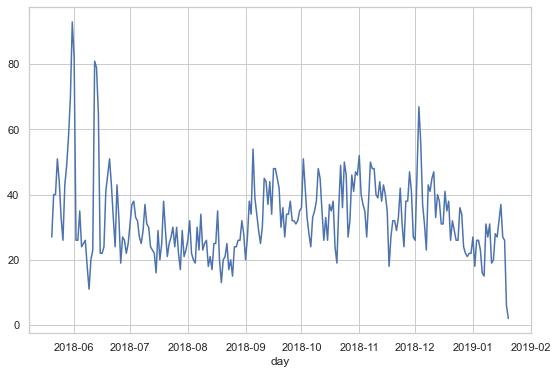

In [17]:
events_data.groupby('day')['user_id'].nunique().plot()

<AxesSubplot:>

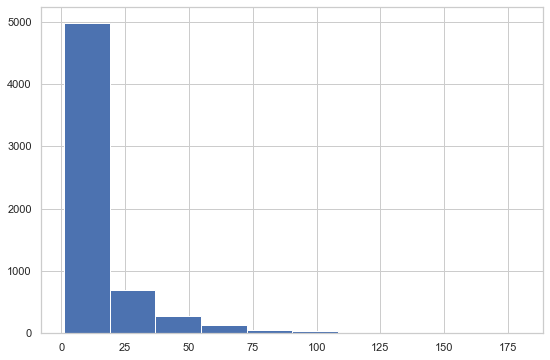

In [26]:
events_data[['user_id', 'action', 'step_id']]\
    .query('action == "discovered"')\
    .pivot_table(
        index='user_id',
        columns='action',
        values='step_id',
        aggfunc='count',
        fill_value=0
    ).reset_index()['discovered'].hist()

In [28]:
users_scores = submission_data.pivot_table(
    index='user_id',
    columns='submission_status',
    values='step_id',
    aggfunc='count',
    fill_value=0
).reset_index()

In [29]:
users_scores.head()

submission_status,user_id,correct,wrong
0,12,1,0
1,13,29,36
2,15,10,30
3,21,24,103
4,35,7,35


In [36]:
users_scores['correct_ratio'] = users_scores['correct'] / (users_scores['wrong'] + users_scores['correct'])

In [37]:
users_scores

submission_status,user_id,correct,wrong,correct_ratio
0,12,1,0,1.000000
1,13,29,36,0.446154
2,15,10,30,0.250000
3,21,24,103,0.188976
4,35,7,35,0.166667
...,...,...,...,...
2798,26775,46,160,0.223301
2799,26780,16,7,0.695652
2800,26785,3,1,0.750000
2801,26796,2,3,0.400000
